In [19]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
from math import pi, inf
from sympy import limit
import time
from scipy.special import jv 
from itertools import product
import time
from scipy import real

In [143]:
# Parameters 
ti_data = (1,2)
lamb = 600*10**(-9)

data1 = {"alpha" : 1/137, "c" : 3*10**8, "m1" : 1, "m2" : 1, "e1" : 1, "e2" : 1, "n1" : 1, "theta1" : 0, "theta2" : pi,  'w' : 1}
data1['w'] = data1['c']*2*pi/(600*10**(-9))
data1["e2"] = ti_data[0]
data1["m2"] = ti_data[1]
data1["delta"] = data1["alpha"]*data1["m1"]*data1["m2"]*(data1["theta2"] - data1["theta1"])/pi
data1["k1"] = data1["n1"]*data1["w"]/data1["c"]
data1["n2"] = np.sqrt(data1['e2']*data1['m2'])
data1["k2"] = data1["n2"]*data1["w"]/data1["c"]
data1['scale'] = 1 

# dataMu2 = {"alpha" : 1/137, "c" : 3*10**8, "m1" : 1, "m2" : 1, "e1" : 1, "n1" : 1, "theta1" : 0, "theta2" : pi, "theta3": 0,  "w" : 1}
# dataMu2['w'] = dataMu2['c']*2*pi/(600*10**(-9))
# dataMu2["e2"] = 1
# dataMu2["m2"] = 3
# dataMu2["n2"] = np.sqrt(dataMu2["m2"]*dataMu2["e2"])
# dataMu2["e3"] = 1
# dataMu2["m3"] = 10**5
# dataMu2["n3"] = 10**(5/2)
# dataMu2["k1"] = dataMu2["n1"]*dataMu2["w"]/dataMu2["c"]
# dataMu2["k2"] = dataMu2["n2"]*dataMu2["w"]/dataMu2["c"]
# dataMu2["k3"] = dataMu2["n3"]*dataMu2["w"]/dataMu2["c"]
# dataMu2["delta"] = dataMu2["alpha"]*dataMu2["m1"]*dataMu2["m2"]*(dataMu2["theta1"] - dataMu2["theta2"])/pi
# dataMu2["scale"] = 1
# dataMu2["dist12"] = 100*10**(-9) #esto esta a escala 600nm (son 100nm - visto de un paper en donde trbajaban con thin films de 1000 Amstrong)
# dataMu2["dist23"] = 0

dataMu2 = {"alpha" : 1/137, "c" : 3*10**8, "m1" : 1, "m2" : 1, "e1" : 1, "n1" : 1, "theta1" : 0, "theta2" : 0, "theta3": pi,  "w" : 1}
dataMu2['w'] = dataMu2['c']*2*pi/(600*10**(-9))
dataMu2["e3"] = ti_data[0]
dataMu2["m3"] = ti_data[1]
dataMu2["n3"] = np.sqrt(dataMu2["m3"]*dataMu2["e3"])
dataMu2["e2"] = 1
dataMu2["m2"] = 10**5
dataMu2["n2"] = 10**(5/2)
dataMu2["k1"] = dataMu2["n1"]*dataMu2["w"]/dataMu2["c"]
dataMu2["k2"] = dataMu2["n2"]*dataMu2["w"]/dataMu2["c"]
dataMu2["k3"] = dataMu2["n3"]*dataMu2["w"]/dataMu2["c"]
dataMu2["delta"] = dataMu2["alpha"]*dataMu2["m1"]*dataMu2["m2"]*(dataMu2["theta1"] - dataMu2["theta2"])/pi
dataMu2["scale"] = 1
dataMu2["dist12"] = 100*10**(-9) #esto esta a escala 600nm (son 100nm - visto de un paper en donde trbajaban con thin films de 1000 Amstrong)
dataMu2["dist23"] = 0

dataMu3 = {"alpha" : 1/137, "c" : 3*10**8, "m1" : 1, "m2" : 1, "e1" : 1, "n1" : 1, "theta1" : 0, "theta2" : pi, "theta3": 0,  "w" : 1}
dataMu3['w'] = dataMu2['c']*2*pi/(600*10**(-9))
dataMu3["e2"] = ti_data[0]
dataMu3["m2"] = ti_data[1]
dataMu3["n2"] = np.sqrt(dataMu3["m2"]*dataMu3["e2"])
dataMu3["e3"] = 1
dataMu3["m3"] = 10**5
dataMu3["n3"] = 10**(5/2)
dataMu3["k1"] = dataMu3["n1"]*dataMu3["w"]/dataMu3["c"]
dataMu3["k2"] = dataMu3["n2"]*dataMu3["w"]/dataMu3["c"]
dataMu3["k3"] = dataMu3["n3"]*dataMu3["w"]/dataMu3["c"]
dataMu3["delta"] = dataMu3["alpha"]*dataMu3["m1"]*dataMu3["m2"]*(dataMu3["theta1"] - dataMu3["theta2"])/pi
dataMu3["scale"] = 1
dataMu3["dist12"] = 100*10**(-9) #esto esta a escala 600nm (son 100nm - visto de un paper en donde trbajaban con thin films de 1000 Amstrong)
dataMu3["dist23"] = 0

In [144]:
# Reflexion and Transmission Matrix coeffs 
def Rtmtm(kp, e1, e2, k1, k2, m1, m2, n1, n2, delta, c, **kwargs): 
    thingy = ( (e2*np.sqrt(k1**2-kp**2)-e1*np.sqrt(k2**2-kp**2) )*(m1*m2*(m2*np.sqrt(k1**2-kp**2)+m1*np.sqrt(k2**2-kp**2))) + np.sqrt(k1**2-kp**2)*np.sqrt(k2**2-kp**2)*delta**2)/( (e2*np.sqrt(k1**2-kp**2) + e1*np.sqrt(k2**2-kp**2) )*(m1*m2*(m2*np.sqrt(k1**2-kp**2)+m1*np.sqrt(k2**2-kp**2))) + np.sqrt(k1**2-kp**2)*np.sqrt(k2**2-kp**2)*delta**2)
    return thingy

def Rtetm(kp, e1, e2, k1, k2, m1, m2, n1, n2, delta, c, **kwargs):
    thingy = -2*m2*n1*np.sqrt(k1**2-kp**2)*np.sqrt(k2**2-kp**2)*delta/( (e2*np.sqrt(k1**2-kp**2) + e1*np.sqrt(k2**2-kp**2) )*(m1*m2*(m2*np.sqrt(k1**2-kp**2)+m1*np.sqrt(k2**2-kp**2))) + np.sqrt(k1**2-kp**2)*np.sqrt(k2**2-kp**2)*delta**2)
    return thingy

def Rtete(kp, e1, e2, k1, k2, m1, m2, n1, n2, delta, c, **kwargs):
    thingy = ( (m2*np.sqrt(k1**2-kp**2)-m1*np.sqrt(k2**2-kp**2) )*(m1*m2*(e2*np.sqrt(k1**2-kp**2)+e1*np.sqrt(k2**2-kp**2))) + np.sqrt(k1**2-kp**2)*np.sqrt(k2**2-kp**2)*delta**2)/( (m2*np.sqrt(k1**2-kp**2) + m1*np.sqrt(k2**2-kp**2) )*(m1*m2*(e2*np.sqrt(k1**2-kp**2)+e1*np.sqrt(k2**2-kp**2))) + np.sqrt(k1**2-kp**2)*np.sqrt(k2**2-kp**2)*delta**2)
    return thingy

def Rtmte(kp, e1, e2, k1, k2, m1, m2, n1, n2, delta, c, **kwargs):
    thingy = -2*m2*n1*np.sqrt(k1**2-kp**2)*np.sqrt(k2**2-kp**2)*delta/( (m2*np.sqrt(k1**2-kp**2) + m1*np.sqrt(k2**2-kp**2) )*(m1*m2*(e2*np.sqrt(k1**2-kp**2)+e1*np.sqrt(k2**2-kp**2))) + np.sqrt(k1**2-kp**2)*np.sqrt(k2**2-kp**2)*delta**2)
    return thingy

def Ttmtm(kp, e1, e2, k1, k2, m1, m2, n1, n2, delta, c, **kwargs):
    thingy = n2/n1 * (2*e1*np.sqrt(k1**2-kp**2))*(m1*m2*(m2*np.sqrt(k1**2-kp**2)+m1*np.sqrt(k2**2-kp**2)))/ ( (e2*np.sqrt(k1**2-kp**2) + e1*np.sqrt(k2**2-kp**2) )*(m1*m2*(m2*np.sqrt(k1**2-kp**2)+m1*np.sqrt(k2**2-kp**2))) + np.sqrt(k1**2-kp**2)*np.sqrt(k2**2-kp**2)*delta**2)
    return thingy
    
def Ttetm(kp, e1, e2, k1, k2, m1, m2, n1, n2, delta, c, **kwargs):
    thingy = -2*m2*n1*np.sqrt(k1**2-kp**2)*np.sqrt(k2**2-kp**2)*delta/( (m2*np.sqrt(k1**2-kp**2) + m1*np.sqrt(k2**2-kp**2) )*(m1*m2*(e2*np.sqrt(k1**2-kp**2)+e1*np.sqrt(k2**2-kp**2))) + np.sqrt(k1**2-kp**2)*np.sqrt(k2**2-kp**2)*delta**2)
    return thingy

def Ttmte(kp, e1, e2, k1, k2, m1, m2, n1, n2, delta, c, **kwargs):
    thingy = 2*m2*n2*np.sqrt(k1**2-kp**2)**2*delta/( (m2*np.sqrt(k1**2-kp**2) + m1*np.sqrt(k2**2-kp**2) )*(m1*m2*(e2*np.sqrt(k1**2-kp**2)+e1*np.sqrt(k2**2-kp**2))) + np.sqrt(k1**2-kp**2)*np.sqrt(k2**2-kp**2)*delta**2)
    return thingy

def Ttete(kp, e1, e2, k1, k2, m1, m2, n1, n2, delta, c, **kwargs):
    thingy = 2*m2*np.sqrt(k1**2-kp**2)*(m1*m2*(e2*np.sqrt(k1**2-kp**2)+e1*np.sqrt(k2**2-kp**2)))/( (m2*np.sqrt(k1**2-kp**2) + m1*np.sqrt(k2**2-kp**2) )*(m1*m2*(e2*np.sqrt(k1**2-kp**2)+e1*np.sqrt(k2**2-kp**2))) + np.sqrt(k1**2-kp**2)*np.sqrt(k2**2-kp**2)*delta**2)
    return thingy

In [145]:
# Reflection Matrix 3-Layer
def ReflectiveMatrix(kp, e1, e2, k1, k2, m1, m2, n1, n2, delta, c):
    # print(e1, e2, k1, k2, m1, m2, n1, n2)
    return np.array([[Rtete(kp, e1, e2, k1, k2, m1, m2, n1, n2, delta, c), Rtetm(kp, e1, e2, k1, k2, m1, m2, n1, n2, delta, c)], [Rtmte(kp, e1, e2, k1, k2, m1, m2, n1, n2, delta, c), Rtmtm(kp, e1, e2, k1, k2, m1, m2, n1, n2, delta, c)]])

def TransmisiveMatrix(kp, e1, e2, k1, k2, m1, m2, n1, n2, delta, c):
    return np.array([[Ttete(kp, e1, e2, k1, k2, m1, m2, n1, n2, delta, c), Ttetm(kp, e1, e2, k1, k2, m1, m2, n1, n2, delta, c)], [Ttmte(kp, e1, e2, k1, k2, m1, m2, n1, n2, delta, c), Ttmtm(kp, e1, e2, k1, k2, m1, m2, n1, n2, delta, c)]])

def VelocityMatrix(kp, e1, e2, e3, k1, k2, k3, m1, m2, m3, n1, n2, n3, c, dist12, dist23, theta1, theta2, theta3, alpha):
    delta21 =  alpha*m2*m1*(theta1 - theta2)/pi
    delta23 =  alpha*m2*m3*(theta3 - theta2)/pi
    r21 = ReflectiveMatrix(kp, e2, e1, k2, k1, m2, m1, n2, n1, delta21, c)
    r23 = ReflectiveMatrix(kp, e2, e3, k2, k3, m2, m3, n2, n3, delta23, c)
    return np.array([[1,0],[0,1]]) - np.e**(2j*np.sqrt(k2**2-kp**2)*(dist12-dist23))*(r21.dot(r23))

def ThreeLayerReflexive(kp, e1, e2, e3, k1, k2, k3, m1, m2, m3, n1, n2, n3, c, dist12, dist23, theta1, theta2, theta3, alpha):
    # print(kp, e1, e2, e3, k1, k2, k3, m1, m2, m3, n1, n2, n3, c, dist12, dist23, theta1, theta2, theta3, alpha)
    delta21 =  alpha*m2*m1*(theta1 - theta2)/pi
    delta23 =  alpha*m2*m3*(theta3 - theta2)/pi
    delta12 =  alpha*m1*m2*(theta2 - theta1)/pi
    r12 = ReflectiveMatrix(kp, e1, e2, k1, k2, m1, m2, n1, n2, delta12, c)
    t21 = TransmisiveMatrix(kp, e2, e1, k2, k1, m2, m1, n2, n1, delta21, c)
    r23 = ReflectiveMatrix(kp, e2, e3, k2, k3, m2, m3, n2, n3, delta23, c)
    M = np.linalg.inv(VelocityMatrix(kp, e1, e2, e3, k1, k2, k3, m1, m2, m3, n1, n2, n3, c, dist12, dist23, theta1, theta2, theta3, alpha))
    t12 = TransmisiveMatrix(kp, e1, e2, k1, k2, m1, m2, n1, n2, delta12, c)
    M2 = t21.dot(r23).dot(M).dot(t12)
    return  r12 + np.e**(-2j*np.sqrt(k2**2-kp**2)*(dist23-dist12))*M2


def RteteMU(kp, e1, e2, e3, k1, k2, k3, m1, m2, m3, n1, n2, n3, delta, c, dist12, dist23, theta1, theta2, theta3, alpha, **kwargs):
    thingy = ThreeLayerReflexive(kp, e1, e2, e3, k1, k2, k3, m1, m2, m3, n1, n2, n3, c, dist12, dist23, theta1, theta2, theta3, alpha)[0,0]
    return thingy

def RtetmMU(kp, e1, e2, e3, k1, k2, k3, m1, m2, m3, n1, n2, n3, delta, c, dist12, dist23, theta1, theta2, theta3, alpha, **kwargs):
    thingy = ThreeLayerReflexive(kp, e1, e2, e3, k1, k2, k3, m1, m2, m3, n1, n2, n3, c, dist12, dist23, theta1, theta2, theta3, alpha)[0,1]
    return thingy

def RtmtmMU(kp, e1, e2, e3, k1, k2, k3, m1, m2, m3, n1, n2, n3, delta, c, dist12, dist23, theta1, theta2, theta3, alpha, **kwargs):
    thingy = ThreeLayerReflexive(kp, e1, e2, e3, k1, k2, k3, m1, m2, m3, n1, n2, n3, c, dist12, dist23, theta1, theta2, theta3, alpha)[1,1]
    return thingy

def RtmteMU(kp, e1, e2, e3, k1, k2, k3, m1, m2, m3, n1, n2, n3, delta, c, dist12, dist23, theta1, theta2, theta3, alpha, **kwargs):
    thingy = ThreeLayerReflexive(kp, e1, e2, e3, k1, k2, k3, m1, m2, m3, n1, n2, n3, c, dist12, dist23, theta1, theta2, theta3, alpha)[1,0]
    return thingy

In [146]:
#G0
def G0(x,y,z,zp=1.5*600*10**(-9),xp=0,yp=0,data=data1):
    x,y,z,zp = x*data['scale'], y*data['scale'], z*data['scale'], zp*data['scale']
    w = data['w']
    k = data['k1']
    R = np.sqrt((x-xp)**2+(y-yp)**2+(z-zp)**2)
    Id = np.array([[1,0,0],[0,1,0],[0,0,1]])
    Rv = np.array([x-xp,y-yp,z-zp])
    thing = np.e**(1j*k*R)/(4*pi*R)*((1 + (1j*k*R-1)/(k**2*R**2))*Id+ (3-3j*k*R-k**2*R**2)/(k**2*R**4)*np.outer(Rv,Rv))
    return thing

def G0_xx(x,y,z,zp=1.5*600*10**(-9),data=data1):
    thing = np.imag(G0(x,y,z,zp=zp,data=data)[0,0])
    if abs(thing) >= 10**(9): return 0
    return thing

def G0_yx(x,y,z,zp=1.5*600*10**(-9),data=data1):
    return np.imag(G0(x,y,z,zp=zp,data=data)[1,0])

def G0_zx(x,y,z,zp=1.5*600*10**(-9),data=data1):
    return np.imag(G0(x,y,z,zp=zp,data=data)[2,0])

def G0_xy(x,y,z,zp=1.5*600*10**(-9),data=data1):
    return np.imag(G0(x,y,z,zp=zp,data=data)[0,1])

def G0_yy(x,y,z,zp=1.5*600*10**(-9),data=data1):
    return np.imag(G0(x,y,z,zp=zp,data=data)[1,1])

def G0_zy(x,y,z,zp=1.5*600*10**(-9),data=data1):
    return np.imag(G0(x,y,z,zp=zp,data=data)[2,1])

def G0_xz(x,y,z,zp=1.5*600*10**(-9),data=data1):
    return np.imag(G0(x,y,z,zp=zp,data=data)[0,2])

def G0_yz(x,y,z,zp=1.5*600*10**(-9),data=data1):
    return np.imag(G0(x,y,z,zp=zp,data=data)[1,2])

def G0_zz(x,y,z,zp=1.5*600*10**(-9),data=data1):
    return np.imag(G0(x,y,z,zp=zp,data=data)[2,2])

G0zz = np.vectorize(G0_zz)
G0yz = np.vectorize(G0_yz)
G0xz = np.vectorize(G0_xz)
G0xx = np.vectorize(G0_xx)
G0yx = np.vectorize(G0_yx)
G0zx = np.vectorize(G0_zx)
G0xy = np.vectorize(G0_xy)
G0yy = np.vectorize(G0_yy)
G0zy = np.vectorize(G0_zy)

In [147]:
# Green 2-Layers
def GRzz_integrand(kp, x, y, z, zp, data=data1):
    k1 = data["k1"]
    return np.imag((1j/(4*pi))*(np.e**(1j*np.sqrt(k1**2-kp**2)*(z + zp)))*jv(0,kp*np.sqrt(x**2+y**2))*(kp**3/(k1**2*np.sqrt(k1**2-kp**2)))*Rtmtm(kp, data["e1"], data["e2"], data["k1"], data["k2"], data["m1"], data["m2"], data["n1"], data["n2"], data["delta"], data["c"]))

def GRyz_integrand(kp, x, y, z, zp, data=data1):
    k1 = data["k1"]
    return np.imag((1/(4*pi))*(np.e**(1j*np.sqrt(k1**2-kp**2)*(z + zp)))*jv(1,kp*np.sqrt(x**2+y**2))*(kp**2/(k1*np.sqrt(k1**2-kp**2)))*Rtetm(kp, data["e1"], data["e2"], data["k1"], data["k2"], data["m1"], data["m2"], data["n1"], data["n2"], data["delta"], data["c"]))

def GRxz_integrand(kp, x, y, z, zp, data=data1):
    rtmtm = Rtmtm(kp, data["e1"], data["e2"], data["k1"], data["k2"], data["m1"], data["m2"], data["n1"], data["n2"], data["delta"], data["c"])
    k1 = data["k1"]
    return np.imag((1/(4*pi))*(np.e**(1j*np.sqrt(k1**2-kp**2)*(z + zp)))*jv(1,kp*np.sqrt(x**2+y**2))*(kp**2/k1**2)*rtmtm)

def GRxx_integrand(kp, x, y, z, zp, data=data1):
    rtmtm = Rtmtm(kp, data["e1"], data["e2"], data["k1"], data["k2"], data["m1"], data["m2"], data["n1"], data["n2"], data["delta"], data["c"])
    rtete = Rtete(kp, data["e1"], data["e2"], data["k1"], data["k2"], data["m1"], data["m2"], data["n1"], data["n2"], data["delta"], data["c"])
    k1 = data["k1"]
    return np.imag((1j/(8*pi))*(np.e**(1j*np.sqrt(k1**2-kp**2)*(z + zp)))*((jv(0,kp*np.sqrt(x**2+y**2)) + jv(2,kp*np.sqrt(x**2+y**2)))*(kp/(np.sqrt(k1**2-kp**2)))*rtete - (jv(0,kp*np.sqrt(x**2+y**2)) - jv(2,kp*np.sqrt(x**2+y**2)))*(kp*np.sqrt(k1**2-kp**2)/k1**2)*rtmtm))

def GRyx_integrand(kp, x, y, z, zp, data=data1):
    rtetm = Rtetm(kp, data["e1"], data["e2"], data["k1"], data["k2"], data["m1"], data["m2"], data["n1"], data["n2"], data["delta"], data["c"])
    rtmte = Rtmte(kp, data["e1"], data["e2"], data["k1"], data["k2"], data["m1"], data["m2"], data["n1"], data["n2"], data["delta"], data["c"])
    k1 = data["k1"]
    return np.imag((-1j/(8*pi))*(np.e**(1j*np.sqrt(k1**2-kp**2)*(z + zp)))*((jv(0,kp*np.sqrt(x**2+y**2)) - jv(2,kp*np.sqrt(x**2+y**2)))*(kp/k1)*rtetm + (jv(0,kp*np.sqrt(x**2+y**2)) + jv(2,kp*np.sqrt(x**2+y**2)))*(kp/k1)*rtmte))

def GRzx_integrand(kp, x, y, z, zp, data=data1):
    rtmtm = Rtmtm(kp, data["e1"], data["e2"], data["k1"], data["k2"], data["m1"], data["m2"], data["n1"], data["n2"], data["delta"], data["c"])
    k1 = data["k1"]
    return np.imag((-1/(4*pi))*(np.e**(1j*np.sqrt(k1**2-kp**2)*(z + zp)))*jv(1,kp*np.sqrt(x**2+y**2))*(kp**2/k1**2)*rtmtm)

def GRyy_integrand(kp, x, y, z, zp, data=data1):
    rtmtm = Rtmtm(kp, data["e1"], data["e2"], data["k1"], data["k2"], data["m1"], data["m2"], data["n1"], data["n2"], data["delta"], data["c"])
    rtete = Rtete(kp, data["e1"], data["e2"], data["k1"], data["k2"], data["m1"], data["m2"], data["n1"], data["n2"], data["delta"], data["c"])
    k1 = data["k1"]
    return np.imag((1j/(8*pi))*(np.e**(1j*np.sqrt(k1**2-kp**2)*(z + zp)))*((jv(0,kp*np.sqrt(x**2+y**2)) - jv(2,kp*np.sqrt(x**2+y**2)))*(kp/(np.sqrt(k1**2-kp**2)))*rtete - (jv(0,kp*np.sqrt(x**2+y**2)) + jv(2,kp*np.sqrt(x**2+y**2)))*(kp*np.sqrt(k1**2-kp**2)/k1**2)*rtmtm))

def GRxy_integrand(kp, x, y, z, zp, data=data1):
    rtetm = Rtetm(kp, data["e1"], data["e2"], data["k1"], data["k2"], data["m1"], data["m2"], data["n1"], data["n2"], data["delta"], data["c"])
    rtmte = Rtmte(kp, data["e1"], data["e2"], data["k1"], data["k2"], data["m1"], data["m2"], data["n1"], data["n2"], data["delta"], data["c"])
    k1 = data["k1"]
    return np.imag((1j/(8*pi))*(np.e**(1j*np.sqrt(k1**2-kp**2)*(z + zp)))*((jv(0,kp*np.sqrt(x**2+y**2)) + jv(2,kp*np.sqrt(x**2+y**2)))*(kp/k1)*rtetm + (jv(0,kp*np.sqrt(x**2+y**2)) - jv(2,kp*np.sqrt(x**2+y**2)))*(kp/k1)*rtmte))

def GRzy_integrand(kp, x, y, z, zp, data=data1):
    rtmte = Rtmte(kp, data["e1"], data["e2"], data["k1"], data["k2"], data["m1"], data["m2"], data["n1"], data["n2"], data["delta"], data["c"])
    k1 = data["k1"]
    return np.imag((1/(4*pi))*(np.e**(1j*np.sqrt(k1**2-kp**2)*(z + zp)))*jv(1,kp*np.sqrt(x**2+y**2))*(kp**2/(k1*np.sqrt(k1**2-kp**2)))*rtmte)

In [148]:
def G_xz(x, y, z, zp=1.5*600*10**(-9), data=data1):
    x,y,z,zp = x*data['scale'], y*data['scale'], z*data['scale'], zp*data['scale']
    return quad(GRxz_integrand, 0, data1['k1'], args=(x,y,z,zp,data,))[0]

def G_yz(x, y, z, zp=1.5*600*10**(-9), data=data1):
    x,y,z,zp = x*data['scale'], y*data['scale'], z*data['scale'], zp*data['scale']
    return quad(GRyz_integrand, 0, data1['k1'], args=(x,y,z,zp,data,))[0]

def G_zz(x, y, z, zp=1.5*600*10**(-9), data=data1):
    x,y,z,zp = x*data['scale'], y*data['scale'], z*data['scale'], zp*data['scale']
    return quad(GRzz_integrand, 0, data1['k1'], args=(x,y,z,zp,data,))[0]

def G_xx(x, y, z, zp=1.5*600*10**(-9), data=data1):
    x,y,z,zp = x*data['scale'], y*data['scale'], z*data['scale'], zp*data['scale']
    return quad(GRxx_integrand, 0, data1['k1'], args=(x,y,z,zp,data,))[0]

def G_yx(x, y, z, zp=1.5*600*10**(-9), data=data1):
    x,y,z,zp = x*data['scale'], y*data['scale'], z*data['scale'], zp*data['scale']
    return quad(GRyx_integrand, 0, data1['k1'], args=(x,y,z,zp,data,))[0]

def G_zx(x, y, z, zp=1.5*600*10**(-9), data=data1):
    x,y,z,zp = x*data['scale'], y*data['scale'], z*data['scale'], zp*data['scale']
    return quad(GRzx_integrand, 0, data1['k1'], args=(x,y,z,zp,data,))[0]

def G_xy(x, y, z, zp=1.5*600*10**(-9), data=data1):
    x,y,z,zp = x*data['scale'], y*data['scale'], z*data['scale'], zp*data['scale']
    return quad(GRxy_integrand, 0, data1['k1'], args=(x,y,z,zp,data,))[0]

def G_yy(x, y, z, zp=1.5*600*10**(-9), data=data1):
    x,y,z,zp = x*data['scale'], y*data['scale'], z*data['scale'], zp*data['scale']
    return quad(GRyy_integrand, 0, data1['k1'], args=(x,y,z,zp,data,))[0]

def G_zy(x, y, z, zp=1.5*600*10**(-9), data=data1):
    x,y,z,zp = x*data['scale'], y*data['scale'], z*data['scale'], zp*data['scale']
    return quad(GRzy_integrand, 0, data1['k1'], args=(x,y,z,zp,data,))[0]

Gzz = np.vectorize(G_zz)
Gyz = np.vectorize(G_yz)
Gxz = np.vectorize(G_xz)
Gxx = np.vectorize(G_xx)
Gyx = np.vectorize(G_yx)
Gzx = np.vectorize(G_zx)
Gxy = np.vectorize(G_xy)
Gyy = np.vectorize(G_yy)
Gzy = np.vectorize(G_zy)

In [149]:
# Green 3-Layers
def GRMuzz_integrand(kp, x, y, z, zp, data=dataMu2):
    k1 = data["k1"]
    return np.imag((1j/(4*pi))*(np.e**(1j*np.sqrt(k1**2-kp**2)*(z + zp)))*jv(0,kp*np.sqrt(x**2+y**2))*(kp**3/(k1**2*np.sqrt(k1**2-kp**2)))*RtmtmMU(kp, **data))

def GRMuyz_integrand(kp, x, y, z, zp, data=dataMu2):
    k1 = data["k1"]
    return np.imag((1/(4*pi))*(np.e**(1j*np.sqrt(k1**2-kp**2)*(z + zp)))*jv(1,kp*np.sqrt(x**2+y**2))*(kp**2/(k1*np.sqrt(k1**2-kp**2)))*RtetmMU(kp, **data))

def GRMuxz_integrand(kp, x, y, z, zp, data=dataMu2):
    rtmtm = RtmtmMU(kp, **data)
    k1 = data["k1"]
    return np.imag((1/(4*pi))*(np.e**(1j*np.sqrt(k1**2-kp**2)*(z + zp)))*jv(1,kp*np.sqrt(x**2+y**2))*(kp**2/k1**2)*rtmtm)

def GRMuxx_integrand(kp, x, y, z, zp, data=dataMu2):
    rtmtm = RtmtmMU(kp, **data)
    rtete = RteteMU(kp, **data)
    k1 = data["k1"]
    return np.imag((1j/(8*pi))*(np.e**(1j*np.sqrt(k1**2-kp**2)*(z + zp)))*((jv(0,kp*np.sqrt(x**2+y**2)) + jv(2,kp*np.sqrt(x**2+y**2)))*(kp/(np.sqrt(k1**2-kp**2)))*rtete - (jv(0,kp*np.sqrt(x**2+y**2)) - jv(2,kp*np.sqrt(x**2+y**2)))*(kp*np.sqrt(k1**2-kp**2)/k1**2)*rtmtm))

def GRMuyx_integrand(kp, x, y, z, zp, data=dataMu2):
    rtetm = RtetmMU(kp, **data)
    rtmte = RtmteMU(kp, **data)
    k1 = data["k1"]
    return np.imag((-1j/(8*pi))*(np.e**(1j*np.sqrt(k1**2-kp**2)*(z + zp)))*((jv(0,kp*np.sqrt(x**2+y**2)) - jv(2,kp*np.sqrt(x**2+y**2)))*(kp/k1)*rtetm + (jv(0,kp*np.sqrt(x**2+y**2)) + jv(2,kp*np.sqrt(x**2+y**2)))*(kp/k1)*rtmte))

def GRMuzx_integrand(kp, x, y, z, zp, data=dataMu2):
    rtmtm = RtmtmMU(kp, **data)
    k1 = data["k1"]
    return np.imag((-1/(4*pi))*(np.e**(1j*np.sqrt(k1**2-kp**2)*(z + zp)))*jv(1,kp*np.sqrt(x**2+y**2))*(kp**2/k1**2)*rtmtm)

def GRMuyy_integrand(kp, x, y, z, zp, data=dataMu2):
    rtmtm = RtmtmMU(kp, **data)
    rtete = RteteMU(kp, **data)
    k1 = data["k1"]
    return np.imag((1j/(8*pi))*(np.e**(1j*np.sqrt(k1**2-kp**2)*(z + zp)))*((jv(0,kp*np.sqrt(x**2+y**2)) - jv(2,kp*np.sqrt(x**2+y**2)))*(kp/(np.sqrt(k1**2-kp**2)))*rtete - (jv(0,kp*np.sqrt(x**2+y**2)) + jv(2,kp*np.sqrt(x**2+y**2)))*(kp*np.sqrt(k1**2-kp**2)/k1**2)*rtmtm))

def GRMuxy_integrand(kp, x, y, z, zp, data=dataMu2):
    rtetm = RtetmMU(kp, **data)
    rtmte = RtmteMU(kp, **data)
    k1 = data["k1"]
    return np.imag((1j/(8*pi))*(np.e**(1j*np.sqrt(k1**2-kp**2)*(z + zp)))*((jv(0,kp*np.sqrt(x**2+y**2)) + jv(2,kp*np.sqrt(x**2+y**2)))*(kp/k1)*rtetm + (jv(0,kp*np.sqrt(x**2+y**2)) - jv(2,kp*np.sqrt(x**2+y**2)))*(kp/k1)*rtmte))

def GRMuzy_integrand(kp, x, y, z, zp, data=dataMu2):
    rtmte = RtmteMU(kp, **data)
    k1 = data["k1"]
    return np.imag((1/(4*pi))*(np.e**(1j*np.sqrt(k1**2-kp**2)*(z + zp)))*jv(1,kp*np.sqrt(x**2+y**2))*(kp**2/(k1*np.sqrt(k1**2-kp**2)))*rtmte)


In [150]:
def GMu_xz(x, y, z, zp=1.5*600*10**(-9), data=dataMu2):
    x,y,z,zp = x*data['scale'], y*data['scale'], z*data['scale'], zp*data['scale']
    return quad(GRMuxz_integrand, 0, data['k1'], args=(x,y,z,zp,data,))[0]

def GMu_yz(x, y, z, zp=1.5*600*10**(-9), data=dataMu2):
    x,y,z,zp = x*data['scale'], y*data['scale'], z*data['scale'], zp*data['scale']
    return quad(GRMuyz_integrand, 0, data['k1'], args=(x,y,z,zp,data,))[0]

def GMu_zz(x, y, z, zp=1.5*600*10**(-9), data=dataMu2):
    x,y,z,zp = x*data['scale'], y*data['scale'], z*data['scale'], zp*data['scale']
    return quad(GRMuzz_integrand, 0, data['k1'], args=(x,y,z,zp,data,))[0]

def GMu_xx(x, y, z, zp=1.5*600*10**(-9), data=dataMu2):
    x,y,z,zp = x*data['scale'], y*data['scale'], z*data['scale'], zp*data['scale']
    return quad(GRMuxx_integrand, 0, data['k1'], args=(x,y,z,zp,data,))[0]

def GMu_yx(x, y, z, zp=1.5*600*10**(-9), data=dataMu2):
    x,y,z,zp = x*data['scale'], y*data['scale'], z*data['scale'], zp*data['scale']
    return quad(GRMuyx_integrand, 0, data['k1'], args=(x,y,z,zp,data,))[0]

def GMu_zx(x, y, z, zp=1.5*600*10**(-9), data=dataMu2):
    x,y,z,zp = x*data['scale'], y*data['scale'], z*data['scale'], zp*data['scale']
    return quad(GRMuzx_integrand, 0, data['k1'], args=(x,y,z,zp,data,))[0]

def GMu_xy(x, y, z, zp=1.5*600*10**(-9), data=dataMu2):
    x,y,z,zp = x*data['scale'], y*data['scale'], z*data['scale'], zp*data['scale']
    return quad(GRMuxy_integrand, 0, data['k1'], args=(x,y,z,zp,data,))[0]

def GMu_yy(x, y, z, zp=1.5*600*10**(-9), data=dataMu2):
    x,y,z,zp = x*data['scale'], y*data['scale'], z*data['scale'], zp*data['scale']
    return quad(GRMuyy_integrand, 0, data['k1'], args=(x,y,z,zp,data,))[0]

def GMu_zy(x, y, z, zp=1.5*600*10**(-9), data=dataMu2):
    x,y,z,zp = x*data['scale'], y*data['scale'], z*data['scale'], zp*data['scale']
    return quad(GRMuzy_integrand, 0, data['k1'], args=(x,y,z,zp,data,))[0]

GMuzz = np.vectorize(GMu_zz)
GMuyz = np.vectorize(GMu_yz)
GMuxz = np.vectorize(GMu_xz)
GMuxx = np.vectorize(GMu_xx)
GMuyx = np.vectorize(GMu_yx)
GMuzx = np.vectorize(GMu_zx)
GMuxy = np.vectorize(GMu_xy)
GMuyy = np.vectorize(GMu_yy)
GMuzy = np.vectorize(GMu_zy)

In [151]:
theta_i = np.arange(0,pi/2+0.009, 0.01)
rtmtmMU = np.vectorize(RtmtmMU)
rtetmMU = np.vectorize(RtetmMU)
rtmteMU = np.vectorize(RtmteMU)
rteteMU = np.vectorize(RteteMU)
rtmtm = np.vectorize(Rtmtm)
rtetm = np.vectorize(Rtetm)
rtmte = np.vectorize(Rtmte)
rtete = np.vectorize(Rtete)

kps = dataMu3['k1']*np.sin(theta_i)
rtmtmMU_points1 = rtmtmMU(kps, **dataMu3)
rteteMU_points1 = rteteMU(kps, **dataMu3)
rtmteMU_points1 = rtmteMU(kps, **dataMu3)
rtetmMU_points1 = rtetmMU(kps, **dataMu3)

kps = dataMu2['k1']*np.sin(theta_i)
rtmtmMU_points2 = rtmtmMU(kps, **dataMu2)
rteteMU_points2 = rteteMU(kps, **dataMu2)
rtmteMU_points2 = rtmteMU(kps, **dataMu2)
rtetmMU_points2 = rtetmMU(kps, **dataMu2)

kps = dataMu3['k1']*np.sin(theta_i)
rtmtmMU_points = rtmtm(kps, **data1)
rteteMU_points = rtete(kps, **data1)
rtmteMU_points = rtmte(kps, **data1)
rtetmMU_points = rtetm(kps, **data1)

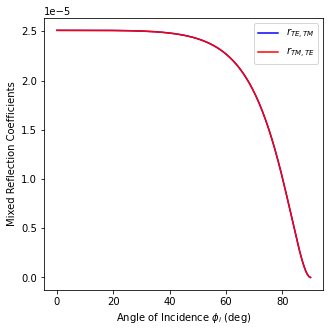

In [152]:
fig, ax = plt.subplots(figsize=(5,5))
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)

ax_rtmtm, = ax.plot(theta_i*180/pi, rtetmMU_points**2, color= 'blue', label=r'$r_{{TE,TM}}$') 
ax_rtete, = ax.plot(theta_i*180/pi, rtmteMU_points**2, color= 'red', label=r'$r_{{TM,TE}}$')

ax.legend(handles=[ax_rtmtm, ax_rtete], prop={'size': 10})
ax.set_ylabel(r'Mixed Reflection Coefficients')
ax.set_xlabel(r'Angle of Incidence $\phi_i$ (deg)')
plt.show()
fig.savefig('plots_report/Fresnel_mixed_mu=2_Air-TI,png', bbox_inches='tight')

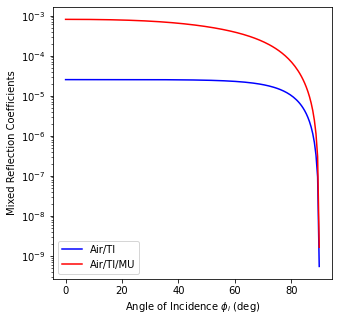

In [153]:
fig, ax = plt.subplots(figsize=(5,5))
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)

ax_rtmtm, = ax.plot(theta_i*180/pi, rtetmMU_points**2, color= 'blue', label=r'Air/TI') 
ax_rtete, = ax.plot(theta_i*180/pi, abs(rtetmMU_points1)**2, color= 'red', label=r'Air/TI/MU')

ax.set_yscale('log')
ax.legend(handles=[ax_rtmtm, ax_rtete], prop={'size': 10})
ax.set_ylabel(r'Mixed Reflection Coefficients')
ax.set_xlabel(r'Angle of Incidence $\phi_i$ (deg)')
plt.show()
fig.savefig('plots_report/Fresnel_mixed_both_config_mu={},ep={}.png'.format(data1['m2'],data1['e2']), bbox_inches='tight')

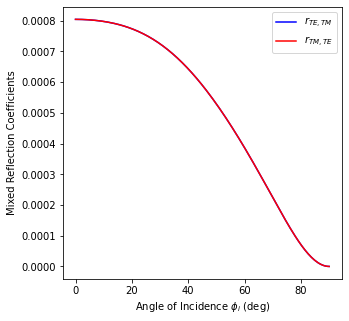

In [154]:
fig, ax = plt.subplots(figsize=(5,5))
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)

ax_rtmtm, = ax.plot(theta_i*180/pi, abs(rtetmMU_points1)**2, color= 'blue', label=r'$r_{{TE,TM}}$') 
ax_rtete, = ax.plot(theta_i*180/pi, abs(rtmteMU_points1)**2, color= 'red', label=r'$r_{{TM,TE}}$')

ax.legend(handles=[ax_rtmtm, ax_rtete], prop={'size': 10})
ax.set_ylabel(r'Mixed Reflection Coefficients')
ax.set_xlabel(r'Angle of Incidence $\phi_i$ (deg)')
plt.show()
fig.savefig('Plots4Maze/Fresnel_mixed_mu=2_Air-TI-MU.png', bbox_inches='tight')

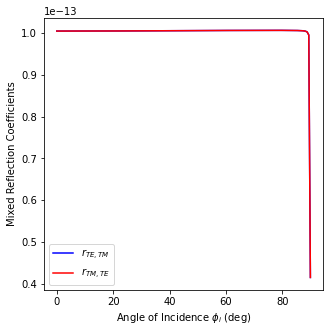

In [155]:
fig, ax = plt.subplots(figsize=(5,5))
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)

ax_rtmtm, = ax.plot(theta_i*180/pi, abs(rtetmMU_points2)**2, color= 'blue', label=r'$r_{{TE,TM}}$') 
ax_rtete, = ax.plot(theta_i*180/pi, abs(rtmteMU_points2)**2, color= 'red', label=r'$r_{{TM,TE}}$')

ax.legend(handles=[ax_rtmtm, ax_rtete], prop={'size': 10})
ax.set_ylabel(r'Mixed Reflection Coefficients')
ax.set_xlabel(r'Angle of Incidence $\phi_i$ (deg)')
plt.show()
fig.savefig('Plots4Maze/Fresnel_mixed_mu=2_Air-MU-TI.png', bbox_inches='tight')

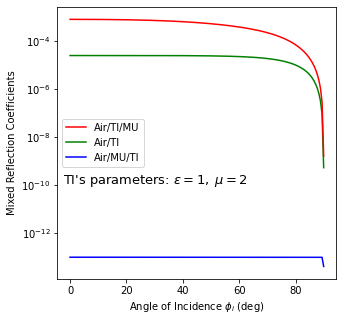

In [156]:
fig, ax = plt.subplots(figsize=(5,5))
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)

ax_no, = ax.plot(theta_i*180/pi, rtetmMU_points**2, color= 'green', label=r'Air/TI') 
ax_top, = ax.plot(theta_i*180/pi, abs(rtetmMU_points2)**2, color= 'blue', label=r'Air/MU/TI') 
ax_bottom, = ax.plot(theta_i*180/pi, abs(rtetmMU_points1)**2, color= 'red', label=r'Air/TI/MU')

ax.text(0.02, 0.35, 'TI\'s parameters: ' + r'$\epsilon={},\; \mu={}$'.format(data1['e2'], data1['m2']), transform=ax.transAxes, size=13)

ax.set_yscale('log')
ax.legend(handles=[ax_bottom, ax_no, ax_top], prop={'size': 10})
ax.set_ylabel(r'Mixed Reflection Coefficients')
ax.set_xlabel(r'Angle of Incidence $\phi_i$ (deg)')
plt.show()
fig.savefig('plots_report/Fresnel_mixed_top_bottom_mu={},ep={}.png'.format(data1['m2'],data1['e2']), bbox_inches='tight')

In [62]:
# Calculating G0
x = np.arange(-2,2, 0.1)*600*10**(-9)
y = [0]*len(x)
z = np.arange(0,3, 0.1)*600*10**(-9)
x,z = np.meshgrid(x,z)

start = time.time()
G0zz_points1 = G0zz(x,0,z, data=data1)
end = time.time()
print('** elapsed time for G0zz calculations: {} seg'.format(end - start))

start = time.time()
G0yz_points1 = G0yz(x,0,z, data=data1)
end = time.time()
print('** elapsed time for G0yz calculations: {} seg'.format(end - start))

start = time.time()
G0xz_points1 = G0xz(x,0,z, data=data1)
end = time.time()
print('** elapsed time for G0xz calculations: {} seg'.format(end - start))

start = time.time()
G0xx_points1 = G0xx(x,0,z, data=data1)
end = time.time()
print('** elapsed time for G0xx calculations: {} seg'.format(end - start))

start = time.time()
G0yx_points1 = G0yx(x,0,z, data=data1)
end = time.time()
print('** elapsed time for G0yx calculations: {} seg'.format(end - start))

start = time.time()
G0zx_points1 = G0zx(x,0,z, data=data1)
end = time.time()
print('** elapsed time for G0zx calculations: {} seg'.format(end - start))

start = time.time()
G0xy_points1 = G0xy(x,0,z, data=data1)
end = time.time()
print('** elapsed time for G0xy calculations: {} seg'.format(end - start))

start = time.time()
G0yy_points1 = G0yy(x,0,z, data=data1)
end = time.time()
print('** elapsed time for G0yy calculations: {} seg'.format(end - start))

start = time.time()
G0zy_points1 = G0zy(x,0,z, data=data1)
end = time.time()
print('** elapsed time for G0zy calculations: {} seg'.format(end - start))

** elapsed time for G0zz calculations: 0.027006864547729492 seg
** elapsed time for G0yz calculations: 0.026006221771240234 seg
** elapsed time for G0xz calculations: 0.02400517463684082 seg
** elapsed time for G0xx calculations: 0.026006221771240234 seg
** elapsed time for G0yx calculations: 0.025005102157592773 seg
** elapsed time for G0zx calculations: 0.025005578994750977 seg
** elapsed time for G0xy calculations: 0.02700662612915039 seg
** elapsed time for G0yy calculations: 0.027005434036254883 seg
** elapsed time for G0zy calculations: 0.026005983352661133 seg


<ipython-input-63-f26c0b1559ee>:30: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout(pad=1.0)


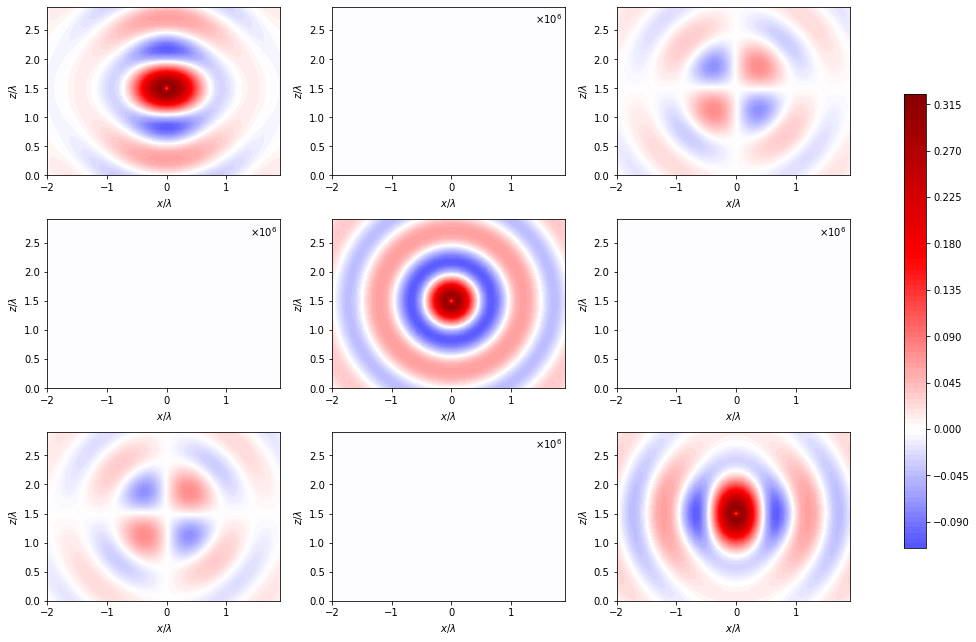

In [63]:
our_cmap = 'seismic'
scaling_factor = (1/600)*10**(9)
v_max,v_min = (560000*lamb,-560000*lamb)

fig, axs = plt.subplots(3, 3, figsize=(12,9))
combinations = [(0,0),(0,1),(0,2),(1,0),(1,1),(1,2),(2,0),(2,1),(2,2)]
cs00 = axs[0,0].contourf(x*scaling_factor, z*scaling_factor, G0xx_points1*lamb, 100, vmin=v_min, vmax=v_max, cmap=our_cmap)
cs01 = axs[0,1].contourf(x*scaling_factor, z*scaling_factor, G0yx_points1*lamb, 100, vmin=v_min, vmax=v_max, cmap=our_cmap)
cs02 = axs[0,2].contourf(x*scaling_factor, z*scaling_factor, G0zx_points1*lamb, 100, vmin=v_min, vmax=v_max, cmap=our_cmap)
cs10 = axs[1,0].contourf(x*scaling_factor, z*scaling_factor, G0xy_points1*lamb, 100, vmin=v_min, vmax=v_max, cmap=our_cmap)
cs11 = axs[1,1].contourf(x*scaling_factor, z*scaling_factor, G0yy_points1*lamb, 100, vmin=v_min, vmax=v_max, cmap=our_cmap)
cs12 = axs[1,2].contourf(x*scaling_factor, z*scaling_factor, G0zy_points1*lamb, 100, vmin=v_min, vmax=v_max, cmap=our_cmap)
cs20 = axs[2,0].contourf(x*scaling_factor, z*scaling_factor, G0xz_points1*lamb, 100, vmin=v_min, vmax=v_max, cmap=our_cmap)
cs21 = axs[2,1].contourf(x*scaling_factor, z*scaling_factor, G0yz_points1*lamb, 100, vmin=v_min, vmax=v_max, cmap=our_cmap)
cs22 = axs[2,2].contourf(x*scaling_factor, z*scaling_factor, G0zz_points1*lamb, 100, vmin=v_min, vmax=v_max, cmap=our_cmap)

css = [cs00, cs01, cs02, cs10, cs11, cs12, cs20, cs21, cs22] 
css1000 = [(0,1), (1,0), (1,2), (2,1)]
for csij in css:
    for c in csij.collections:
        c.set_edgecolor("face")

for i,j in css1000: 
    axs[i,j].annotate(r'$\times 10^6$', (0.87,0.9), xycoords='axes fraction')

fig.colorbar(cs22, cax=fig.add_axes([1.05, 0.15, 0.025, 0.7]))
for c in combinations:
    axs[c[0],c[1]].set_xlabel(r'$x/\lambda$')
    axs[c[0],c[1]].set_ylabel(r'$z/\lambda$')
fig.tight_layout(pad=1.0)
fig.savefig('plots_report/G0_plot.png', bbox_inches='tight')

In [64]:
# Calculating 2-Layer
x = np.arange(-2,2, 0.1)*600*10**(-9)
y = [0]*len(x)
z = np.arange(0,3, 0.1)*600*10**(-9)
x,z = np.meshgrid(x,z)
zp = 1.5*600*10**(-9)

start = time.time()
Gzz_points1 = Gzz(x,0,z, zp=zp, data=data1)
end = time.time()
print('** elapsed time for Gzz calculations: {} seg'.format(end - start))

start = time.time()
Gyz_points1 = Gyz(x,0,z, zp=zp, data=data1)
end = time.time()
print('** elapsed time for Gyz calculations: {} seg'.format(end - start))

start = time.time()
Gxz_points1 = Gxz(x,0,z, zp=zp, data=data1)
end = time.time()
print('** elapsed time for Gxz calculations: {} seg'.format(end - start))

start = time.time()
Gxx_points1 = Gxx(x,0,z, zp=zp, data=data1)
end = time.time()
print('** elapsed time for Gxx calculations: {} seg'.format(end - start))

start = time.time()
Gyx_points1 = Gyx(x,0,z, zp=zp, data=data1)
end = time.time()
print('** elapsed time for Gyx calculations: {} seg'.format(end - start))

start = time.time()
Gzx_points1 = Gzx(x,0,z, zp=zp, data=data1)
end = time.time()
print('** elapsed time for Gzx calculations: {} seg'.format(end - start))

start = time.time()
Gxy_points1 = Gxy(x,0,z, zp=zp, data=data1)
end = time.time()
print('** elapsed time for Gxy calculations: {} seg'.format(end - start))

start = time.time()
Gyy_points1 = Gyy(x,0,z, zp=zp, data=data1)
end = time.time()
print('** elapsed time for Gyy calculations: {} seg'.format(end - start))

start = time.time()
Gzy_points1 = Gzy(x,0,z, zp=zp, data=data1)
end = time.time()
print('** elapsed time for Gzy calculations: {} seg'.format(end - start))

<ipython-input-53-ea53fea771fe>:11: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  return quad(GRzz_integrand, 0, data1['k1'], args=(x,y,z,zp,data,))[0]
<ipython-input-53-ea53fea771fe>:11: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  return quad(GRzz_integrand, 0, data1['k1'], args=(x,y,z,zp,data,))[0]


** elapsed time for Gzz calculations: 17.08283257484436 seg
** elapsed time for Gyz calculations: 0.5351200103759766 seg
** elapsed time for Gxz calculations: 12.452791690826416 seg


<ipython-input-53-ea53fea771fe>:15: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  return quad(GRxx_integrand, 0, data1['k1'], args=(x,y,z,zp,data,))[0]
<ipython-input-53-ea53fea771fe>:15: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  return quad(GRxx_integrand, 0, data1['k1'], args=(x,y,z,zp,data,))[0]


** elapsed time for Gxx calculations: 34.34971570968628 seg
** elapsed time for Gyx calculations: 1.1212506294250488 seg
** elapsed time for Gzx calculations: 12.494801044464111 seg
** elapsed time for Gxy calculations: 1.1392567157745361 seg


<ipython-input-53-ea53fea771fe>:31: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  return quad(GRyy_integrand, 0, data1['k1'], args=(x,y,z,zp,data,))[0]
<ipython-input-53-ea53fea771fe>:31: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  return quad(GRyy_integrand, 0, data1['k1'], args=(x,y,z,zp,data,))[0]


** elapsed time for Gyy calculations: 35.77952814102173 seg
** elapsed time for Gzy calculations: 0.5381217002868652 seg


<ipython-input-65-5254d8b4f5f6>:48: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout(pad=1.0)


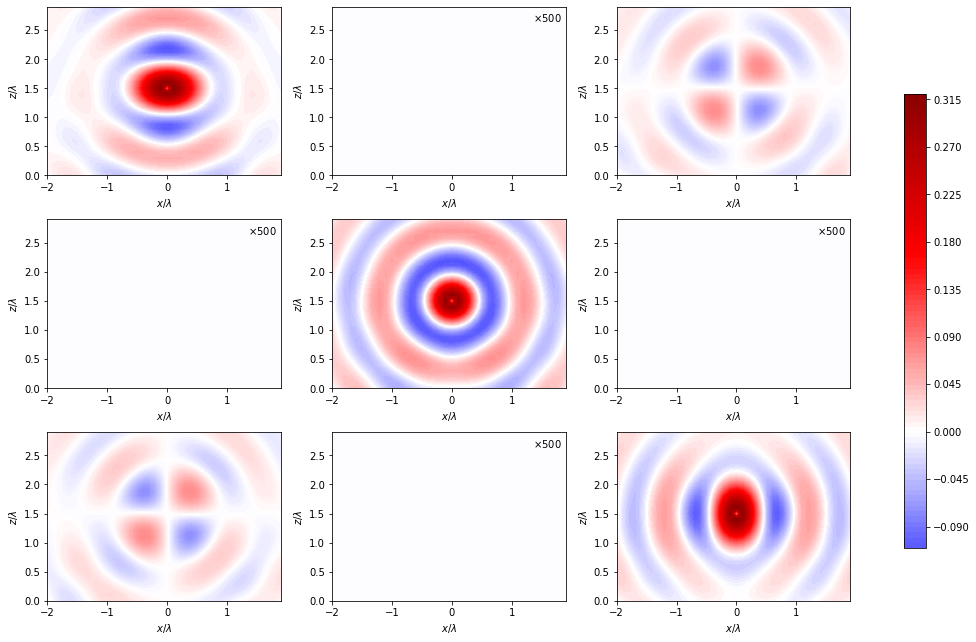

In [65]:
fig, axs = plt.subplots(3, 3, figsize=(12,9))
combinations = [(0,0),(0,1),(0,2),(1,0),(1,1),(1,2),(2,0),(2,1),(2,2)]
v_max,v_min = (560000*lamb,-560000*lamb)
scale_mixed = 500

cs00 = axs[0,0].contourf(x*scaling_factor, z*scaling_factor, (G0xx_points1 + Gxx_points1)*lamb, 100, vmin=v_min, vmax=v_max, cmap=our_cmap)
cs01 = axs[1,0].contourf(x*scaling_factor, z*scaling_factor, (G0yx_points1+ Gyx_points1)*scale_mixed*lamb, 100, vmin=v_min, vmax=v_max, cmap=our_cmap)
cs02 = axs[2,0].contourf(x*scaling_factor, z*scaling_factor, (G0zx_points1 + Gzx_points1)*lamb, 100, vmin=v_min, vmax=v_max, cmap=our_cmap)
cs10 = axs[0,1].contourf(x*scaling_factor, z*scaling_factor, (G0xy_points1 + Gxy_points1)*lamb*scale_mixed, 100, vmin=v_min, vmax=v_max, cmap=our_cmap)
cs11 = axs[1,1].contourf(x*scaling_factor, z*scaling_factor, (G0yy_points1 + Gyy_points1)*lamb, 100, vmin=v_min, vmax=v_max, cmap=our_cmap)
cs12 = axs[2,1].contourf(x*scaling_factor, z*scaling_factor, (G0zy_points1 + Gzy_points1)*lamb*scale_mixed, 100, vmin=v_min, vmax=v_max, cmap=our_cmap)
cs20 = axs[0,2].contourf(x*scaling_factor, z*scaling_factor, (G0xz_points1 + Gxz_points1)*lamb, 100, vmin=v_min, vmax=v_max, cmap=our_cmap)
cs21 = axs[1,2].contourf(x*scaling_factor, z*scaling_factor, (G0yz_points1 + Gyz_points1)*lamb*scale_mixed, 100, vmin=v_min, vmax=v_max, cmap=our_cmap)
cs22 = axs[2,2].contourf(x*scaling_factor, z*scaling_factor, (G0zz_points1 + Gzz_points1)*lamb, 100, vmin=v_min, vmax=v_max, cmap=our_cmap)

# cs00 = axs[0,0].contourf(x*scaling_factor, z*scaling_factor, Gxx_points1, 100, cmap=our_cmap)
# cs01 = axs[0,1].contourf(x*scaling_factor, z*scaling_factor, Gyx_points1, 100, cmap=our_cmap)
# cs02 = axs[0,2].contourf(x*scaling_factor, z*scaling_factor, Gzx_points1, 100, cmap=our_cmap)
# cs10 = axs[1,0].contourf(x*scaling_factor, z*scaling_factor, Gxy_points1, 100, cmap=our_cmap)
# cs11 = axs[1,1].contourf(x*scaling_factor, z*scaling_factor, Gyy_points1, 100, cmap=our_cmap)
# cs12 = axs[1,2].contourf(x*scaling_factor, z*scaling_factor, Gzy_points1, 100, cmap=our_cmap)
# cs20 = axs[2,0].contourf(x*scaling_factor, z*scaling_factor, Gxz_points1, 100, cmap=our_cmap)
# cs21 = axs[2,1].contourf(x*scaling_factor, z*scaling_factor, Gyz_points1, 100, cmap=our_cmap)
# cs22 = axs[2,2].contourf(x*scaling_factor, z*scaling_factor, Gzz_points1, 100, cmap=our_cmap)
# fig.colorbar(cs00, ax=axs[0,0])
# fig.colorbar(cs01, ax=axs[0,1])
# fig.colorbar(cs02, ax=axs[0,2])
# fig.colorbar(cs10, ax=axs[1,0])
# fig.colorbar(cs11, ax=axs[1,1])
# fig.colorbar(cs12, ax=axs[1,2])
# fig.colorbar(cs20, ax=axs[2,0])
# fig.colorbar(cs21, ax=axs[2,1])
# fig.colorbar(cs22, ax=axs[2,2])

css = [cs00, cs01, cs02, cs10, cs11, cs12, cs20, cs21, cs22] 
css1000 = [(0,1), (1,0), (1,2), (2,1)]
for csij in css:
    for c in csij.collections:
        c.set_edgecolor("face")

for i,j in css1000: 
    axs[i,j].annotate(r'$\times 500$', (0.858,0.91), xycoords='axes fraction')

fig.colorbar(cs22, cax=fig.add_axes([1.05, 0.15, 0.025, 0.7]))
for c in combinations:
    axs[c[0],c[1]].set_xlabel(r'$x/\lambda$')
    axs[c[0],c[1]].set_ylabel(r'$z/\lambda$')
fig.tight_layout(pad=1.0)
fig.savefig('plots_report/G_2-layers_no_TI_plot.png', bbox_inches='tight')

In [44]:
# Calculating 3-Layer
x = np.arange(-2,2, 0.1)*600*10**(-9)
y = [0]*len(x)
z = np.arange(0,3, 0.1)*600*10**(-9)
x,z = np.meshgrid(x,z)
zp = 1.5*600*10**(-9)

start = time.time()
GMuzz_points1 = GMuzz(x,0,z, zp=zp, data=dataMu2)
end = time.time()
print('** elapsed time for Gzz calculations: {} seg'.format(end - start))

start = time.time()
GMuyz_points1 = GMuyz(x,0,z, zp=zp, data=dataMu2)
end = time.time()
print('** elapsed time for Gyz calculations: {} seg'.format(end - start))

start = time.time()
GMuxz_points1 = GMuxz(x,0,z, zp=zp, data=dataMu2)
end = time.time()
print('** elapsed time for Gxz calculations: {} seg'.format(end - start))

start = time.time()
GMuxx_points1 = GMuxx(x,0,z, zp=zp, data=dataMu2)
end = time.time()
print('** elapsed time for Gxx calculations: {} seg'.format(end - start))

start = time.time()
GMuyx_points1 = GMuyx(x,0,z, zp=zp, data=dataMu2)
end = time.time()
print('** elapsed time for Gyx calculations: {} seg'.format(end - start))

start = time.time()
GMuzx_points1 = GMuzx(x,0,z, zp=zp, data=dataMu2)
end = time.time()
print('** elapsed time for Gzx calculations: {} seg'.format(end - start))

start = time.time()
GMuxy_points1 = GMuxy(x,0,z, zp=zp, data=dataMu2)
end = time.time()
print('** elapsed time for Gxy calculations: {} seg'.format(end - start))

start = time.time()
GMuyy_points1 = GMuyy(x,0,z, zp=zp, data=dataMu2)
end = time.time()
print('** elapsed time for Gyy calculations: {} seg'.format(end - start))

start = time.time()
GMuzy_points1 = GMuzy(x,0,z, zp=zp, data=dataMu2)
end = time.time()
print('** elapsed time for Gzy calculations: {} seg'.format(end - start))

<ipython-input-27-56da24b9c090>:11: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  return quad(GRMuzz_integrand, 0, data['k1'], args=(x,y,z,zp,data,))[0]
<ipython-input-27-56da24b9c090>:11: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  return quad(GRMuzz_integrand, 0, data['k1'], args=(x,y,z,zp,data,))[0]


** elapsed time for Gzz calculations: 255.11941814422607 seg
** elapsed time for Gyz calculations: 406.4171872138977 seg
** elapsed time for Gxz calculations: 185.05804562568665 seg


<ipython-input-27-56da24b9c090>:15: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  return quad(GRMuxx_integrand, 0, data['k1'], args=(x,y,z,zp,data,))[0]


** elapsed time for Gxx calculations: 1059.0959432125092 seg
** elapsed time for Gyx calculations: 641.4882116317749 seg
** elapsed time for Gzx calculations: 190.82323575019836 seg
** elapsed time for Gxy calculations: 625.0459427833557 seg


<ipython-input-27-56da24b9c090>:31: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  return quad(GRMuyy_integrand, 0, data['k1'], args=(x,y,z,zp,data,))[0]


** elapsed time for Gyy calculations: 1072.498376607895 seg
** elapsed time for Gzy calculations: 405.9446773529053 seg


<ipython-input-45-6dd02181452c>:48: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout(pad=1.0)


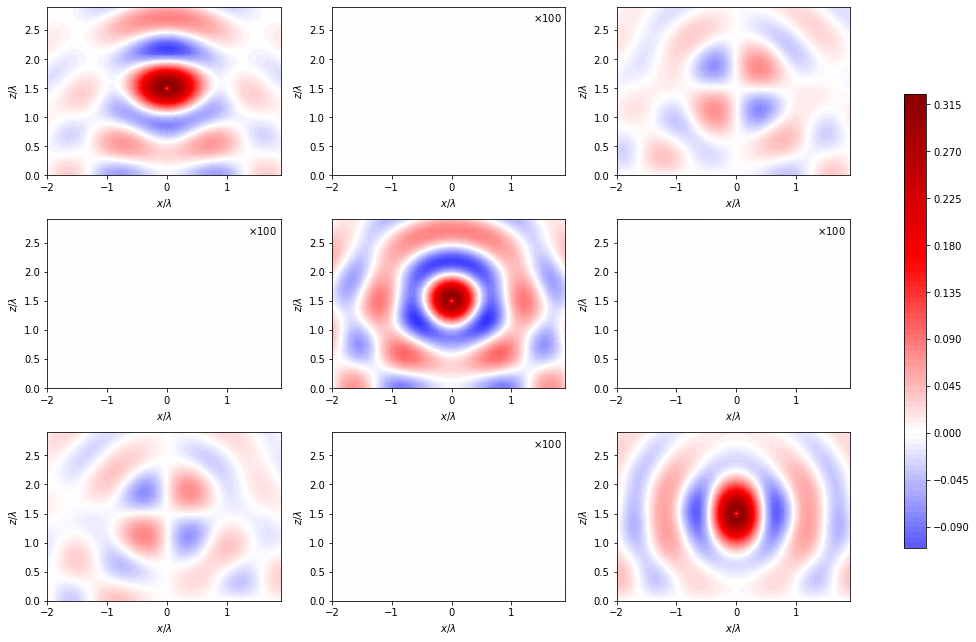

In [45]:
fig, axs = plt.subplots(3, 3, figsize=(12,9))
combinations = [(0,0),(0,1),(0,2),(1,0),(1,1),(1,2),(2,0),(2,1),(2,2)]
v_max,v_min = (560000*lamb,-560000*lamb)
scale_mixed = 100

cs00 = axs[0,0].contourf(x*scaling_factor, z*scaling_factor, (G0xx_points1 + GMuxx_points1)*lamb, 100, vmin=v_min, vmax=v_max, cmap=our_cmap)
cs01 = axs[1,0].contourf(x*scaling_factor, z*scaling_factor, (G0yx_points1+ GMuyx_points1)*lamb*scale_mixed, 100, vmin=v_min, vmax=v_max, cmap=our_cmap)
cs02 = axs[2,0].contourf(x*scaling_factor, z*scaling_factor, (G0zx_points1 + GMuzx_points1)*lamb, 100, vmin=v_min, vmax=v_max, cmap=our_cmap)
cs10 = axs[0,1].contourf(x*scaling_factor, z*scaling_factor, (G0xy_points1 + GMuxy_points1)*lamb*scale_mixed, 100, vmin=v_min, vmax=v_max, cmap=our_cmap)
cs11 = axs[1,1].contourf(x*scaling_factor, z*scaling_factor, (G0yy_points1 + GMuyy_points1)*lamb, 100, vmin=v_min, vmax=v_max, cmap=our_cmap)
cs12 = axs[2,1].contourf(x*scaling_factor, z*scaling_factor, (G0zy_points1 + GMuzy_points1)*lamb*scale_mixed, 100, vmin=v_min, vmax=v_max, cmap=our_cmap)
cs20 = axs[0,2].contourf(x*scaling_factor, z*scaling_factor, (G0xz_points1 + GMuxz_points1)*lamb, 100, vmin=v_min, vmax=v_max, cmap=our_cmap)
cs21 = axs[1,2].contourf(x*scaling_factor, z*scaling_factor, (G0yz_points1 + GMuyz_points1)*lamb*scale_mixed, 100, vmin=v_min, vmax=v_max, cmap=our_cmap)
cs22 = axs[2,2].contourf(x*scaling_factor, z*scaling_factor, (G0zz_points1 + GMuzz_points1)*lamb, 100, vmin=v_min, vmax=v_max, cmap=our_cmap)

# cs00 = axs[0,0].contourf(x*scaling_factor, z*scaling_factor, GMuxx_points1, 100, cmap=our_cmap)
# cs01 = axs[0,1].contourf(x*scaling_factor, z*scaling_factor, GMuyx_points1, 100, cmap=our_cmap)
# cs02 = axs[0,2].contourf(x*scaling_factor, z*scaling_factor, GMuzx_points1, 100, cmap=our_cmap)
# cs10 = axs[1,0].contourf(x*scaling_factor, z*scaling_factor, GMuxy_points1, 100, cmap=our_cmap)
# cs11 = axs[1,1].contourf(x*scaling_factor, z*scaling_factor, GMuyy_points1, 100, cmap=our_cmap)
# cs12 = axs[1,2].contourf(x*scaling_factor, z*scaling_factor, GMuzy_points1, 100, cmap=our_cmap)
# cs20 = axs[2,0].contourf(x*scaling_factor, z*scaling_factor, GMuxz_points1, 100, cmap=our_cmap)
# cs21 = axs[2,1].contourf(x*scaling_factor, z*scaling_factor, GMuyz_points1, 100, cmap=our_cmap)
# cs22 = axs[2,2].contourf(x*scaling_factor, z*scaling_factor, GMuzz_points1, 100, cmap=our_cmap)
# fig.colorbar(cs00, ax=axs[0,0])
# fig.colorbar(cs01, ax=axs[0,1])
# fig.colorbar(cs02, ax=axs[0,2])
# fig.colorbar(cs10, ax=axs[1,0])
# fig.colorbar(cs11, ax=axs[1,1])
# fig.colorbar(cs12, ax=axs[1,2])
# fig.colorbar(cs20, ax=axs[2,0])
# fig.colorbar(cs21, ax=axs[2,1])
# fig.colorbar(cs22, ax=axs[2,2])

css = [cs00, cs01, cs02, cs10, cs11, cs12, cs20, cs21, cs22] 
css1000 = [(0,1), (1,0), (1,2), (2,1)]
for csij in css:
    for c in csij.collections:
        c.set_edgecolor("face")

for i,j in css1000: 
    axs[i,j].annotate(r'$\times 100$', (0.86,0.91), xycoords='axes fraction')

fig.colorbar(cs22, cax=fig.add_axes([1.05, 0.15, 0.025, 0.7]))
for c in combinations:
    axs[c[0],c[1]].set_xlabel(r'$x/\lambda$')
    axs[c[0],c[1]].set_ylabel(r'$z/\lambda$')
fig.tight_layout(pad=1.0)
fig.savefig('plots_report/G_MU-TI_plot_mu={}.png'.format(data1['m2']), bbox_inches='tight')

In [46]:
# Calculating 3-Layer
x = np.arange(-2,2, 0.1)*600*10**(-9)
y = [0]*len(x)
z = np.arange(0,3, 0.1)*600*10**(-9)
x,z = np.meshgrid(x,z)
zp = 1.5*600*10**(-9)

start = time.time()
GMuzz_points2 = GMuzz(x,0,z, zp=zp, data=dataMu3)
end = time.time()
print('** elapsed time for Gzz calculations: {} seg'.format(end - start))

start = time.time()
GMuyz_points2 = GMuyz(x,0,z, zp=zp, data=dataMu3)
end = time.time()
print('** elapsed time for Gyz calculations: {} seg'.format(end - start))

start = time.time()
GMuxz_points2 = GMuxz(x,0,z, zp=zp, data=dataMu3)
end = time.time()
print('** elapsed time for Gxz calculations: {} seg'.format(end - start))

start = time.time()
GMuxx_points2 = GMuxx(x,0,z, zp=zp, data=dataMu3)
end = time.time()
print('** elapsed time for Gxx calculations: {} seg'.format(end - start))

start = time.time()
GMuyx_points2 = GMuyx(x,0,z, zp=zp, data=dataMu3)
end = time.time()
print('** elapsed time for Gyx calculations: {} seg'.format(end - start))

start = time.time()
GMuzx_points2 = GMuzx(x,0,z, zp=zp, data=dataMu3)
end = time.time()
print('** elapsed time for Gzx calculations: {} seg'.format(end - start))

start = time.time()
GMuxy_points2 = GMuxy(x,0,z, zp=zp, data=dataMu3)
end = time.time()
print('** elapsed time for Gxy calculations: {} seg'.format(end - start))

start = time.time()
GMuyy_points2 = GMuyy(x,0,z, zp=zp, data=dataMu3)
end = time.time()
print('** elapsed time for Gyy calculations: {} seg'.format(end - start))

start = time.time()
GMuzy_points2 = GMuzy(x,0,z, zp=zp, data=dataMu3)
end = time.time()
print('** elapsed time for Gzy calculations: {} seg'.format(end - start))

<ipython-input-27-56da24b9c090>:11: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  return quad(GRMuzz_integrand, 0, data['k1'], args=(x,y,z,zp,data,))[0]
<ipython-input-27-56da24b9c090>:11: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  return quad(GRMuzz_integrand, 0, data['k1'], args=(x,y,z,zp,data,))[0]


** elapsed time for Gzz calculations: 306.9404058456421 seg
** elapsed time for Gyz calculations: 188.92762160301208 seg
** elapsed time for Gxz calculations: 222.39717984199524 seg


<ipython-input-27-56da24b9c090>:15: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  return quad(GRMuxx_integrand, 0, data['k1'], args=(x,y,z,zp,data,))[0]


** elapsed time for Gxx calculations: 542.6328761577606 seg
** elapsed time for Gyx calculations: 303.77774310112 seg
** elapsed time for Gzx calculations: 221.1054401397705 seg
** elapsed time for Gxy calculations: 306.3028287887573 seg


<ipython-input-27-56da24b9c090>:31: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  return quad(GRMuyy_integrand, 0, data['k1'], args=(x,y,z,zp,data,))[0]
<ipython-input-26-900d1228e938>:36: RuntimeWarning: divide by zero encountered in double_scalars
  return np.imag((1j/(8*pi))*(np.e**(1j*np.sqrt(k1**2-kp**2)*(z + zp)))*((jv(0,kp*np.sqrt(x**2+y**2)) - jv(2,kp*np.sqrt(x**2+y**2)))*(kp/(np.sqrt(k1**2-kp**2)))*rtete - (jv(0,kp*np.sqrt(x**2+y**2)) + jv(2,kp*np.sqrt(x**2+y**2)))*(kp*np.sqrt(k1**2-kp**2)/k1**2)*rtmtm))
<ipython-input-26-900d1228e938>:36: RuntimeWarning: invalid value encountered in multiply
  return np.imag((1j/(8*pi))*(np.e**(1j*np.sqrt(k1**2-kp**2)*(z + zp)))*((jv(0,kp*np.sqrt(x**2+y**2)) - jv(2,kp*np.sqrt(x**2+y**2)))*(kp/(np.sqrt(k1**2-kp**2)))*rtete - (jv(0,kp*np.sqrt(x**2+y**2)) + jv(2,kp*np.sqrt(x**2+y**2)))*(kp*np.sqrt(k1**2-kp**2)/k1**2)*rtmtm))
<ipython-input-26-900d1228e938>:36: RuntimeWarning: invalid value encountered in cdouble

** elapsed time for Gyy calculations: 545.160817861557 seg
** elapsed time for Gzy calculations: 194.5929446220398 seg


<ipython-input-47-814575aa0f5d>:48: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout(pad=1.0)


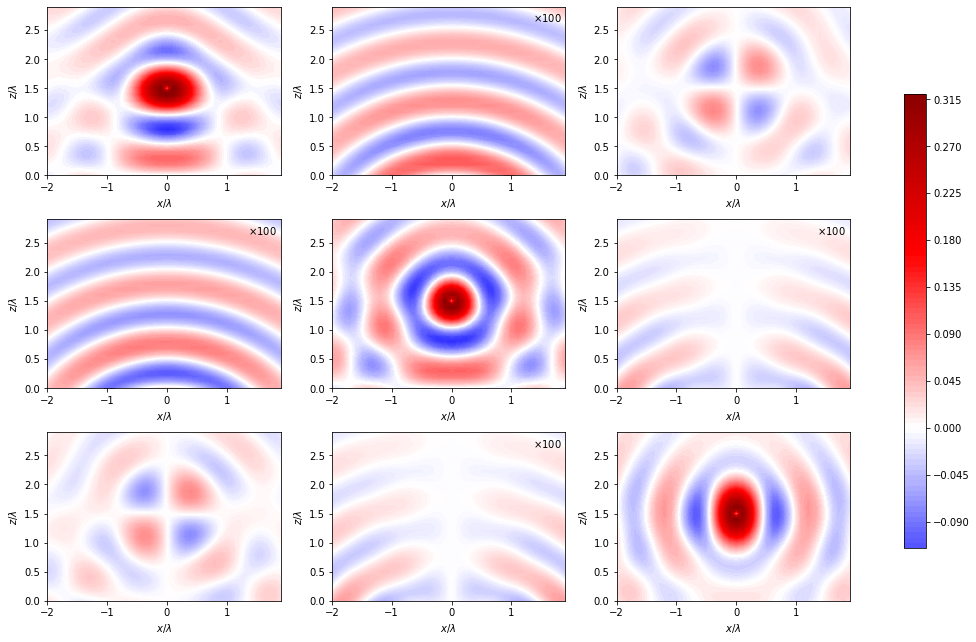

In [47]:
fig, axs = plt.subplots(3, 3, figsize=(12,9))
combinations = [(0,0),(0,1),(0,2),(1,0),(1,1),(1,2),(2,0),(2,1),(2,2)]
v_max,v_min = (560000*lamb,-560000*lamb)
scale_mixed = 100

cs00 = axs[0,0].contourf(x*scaling_factor, z*scaling_factor, (G0xx_points1 + GMuxx_points2)*lamb, 100, vmin=v_min, vmax=v_max, cmap=our_cmap)
cs01 = axs[1,0].contourf(x*scaling_factor, z*scaling_factor, (G0yx_points1+ GMuyx_points2)*lamb*scale_mixed, 100, vmin=v_min, vmax=v_max, cmap=our_cmap)
cs02 = axs[2,0].contourf(x*scaling_factor, z*scaling_factor, (G0zx_points1 + GMuzx_points2)*lamb, 100, vmin=v_min, vmax=v_max, cmap=our_cmap)
cs10 = axs[0,1].contourf(x*scaling_factor, z*scaling_factor, (G0xy_points1 + GMuxy_points2)*lamb*scale_mixed, 100, vmin=v_min, vmax=v_max, cmap=our_cmap)
cs11 = axs[1,1].contourf(x*scaling_factor, z*scaling_factor, (G0yy_points1 + GMuyy_points2)*lamb, 100, vmin=v_min, vmax=v_max, cmap=our_cmap)
cs12 = axs[2,1].contourf(x*scaling_factor, z*scaling_factor, (G0zy_points1 + GMuzy_points2)*lamb*scale_mixed, 100, vmin=v_min, vmax=v_max, cmap=our_cmap)
cs20 = axs[0,2].contourf(x*scaling_factor, z*scaling_factor, (G0xz_points1 + GMuxz_points2)*lamb, 100, vmin=v_min, vmax=v_max, cmap=our_cmap)
cs21 = axs[1,2].contourf(x*scaling_factor, z*scaling_factor, (G0yz_points1 + GMuyz_points2)*lamb*scale_mixed, 100, vmin=v_min, vmax=v_max, cmap=our_cmap)
cs22 = axs[2,2].contourf(x*scaling_factor, z*scaling_factor, (G0zz_points1 + GMuzz_points2)*lamb, 100, vmin=v_min, vmax=v_max, cmap=our_cmap)

# cs00 = axs[0,0].contourf(x*scaling_factor, z*scaling_factor, GMuxx_points2, 100, cmap=our_cmap)
# cs01 = axs[0,1].contourf(x*scaling_factor, z*scaling_factor, GMuyx_points2, 100, cmap=our_cmap)
# cs02 = axs[0,2].contourf(x*scaling_factor, z*scaling_factor, GMuzx_points2, 100, cmap=our_cmap)
# cs10 = axs[1,0].contourf(x*scaling_factor, z*scaling_factor, GMuxy_points2, 100, cmap=our_cmap)
# cs11 = axs[1,1].contourf(x*scaling_factor, z*scaling_factor, GMuyy_points2, 100, cmap=our_cmap)
# cs12 = axs[1,2].contourf(x*scaling_factor, z*scaling_factor, GMuzy_points2, 100, cmap=our_cmap)
# cs20 = axs[2,0].contourf(x*scaling_factor, z*scaling_factor, GMuxz_points2, 100, cmap=our_cmap)
# cs21 = axs[2,1].contourf(x*scaling_factor, z*scaling_factor, GMuyz_points2, 100, cmap=our_cmap)
# cs22 = axs[2,2].contourf(x*scaling_factor, z*scaling_factor, GMuzz_points2, 100, cmap=our_cmap)
# fig.colorbar(cs00, ax=axs[0,0])
# fig.colorbar(cs01, ax=axs[0,1])
# fig.colorbar(cs02, ax=axs[0,2])
# fig.colorbar(cs10, ax=axs[1,0])
# fig.colorbar(cs11, ax=axs[1,1])
# fig.colorbar(cs12, ax=axs[1,2])
# fig.colorbar(cs20, ax=axs[2,0])
# fig.colorbar(cs21, ax=axs[2,1])
# fig.colorbar(cs22, ax=axs[2,2])

css = [cs00, cs01, cs02, cs10, cs11, cs12, cs20, cs21, cs22] 
css1000 = [(0,1), (1,0), (1,2), (2,1)]
for csij in css:
    for c in csij.collections:
        c.set_edgecolor("face")

for i,j in css1000: 
    axs[i,j].annotate(r'$\times 100$', (0.86,0.91), xycoords='axes fraction')

fig.colorbar(cs22, cax=fig.add_axes([1.05, 0.15, 0.025, 0.7]))
for c in combinations:
    axs[c[0],c[1]].set_xlabel(r'$x/\lambda$')
    axs[c[0],c[1]].set_ylabel(r'$z/\lambda$')
fig.tight_layout(pad=1.0)
fig.savefig('plots_report/G_TI-MU_plot_mu={}.png'.format(data1['m2']), bbox_inches='tight')

In [14]:
dataMu4 = {"alpha" : 1/137, "c" : 3*10**8, "m1" : 1, "m2" : 1, "e1" : 1, "n1" : 1, "theta1" : 0, "theta2" : 0, "theta3": pi,  "w" : 1}
dataMu4['w'] = dataMu4['c']*2*pi/(600*10**(-9))
dataMu4["e3"] = 16
dataMu4["m3"] = 1
dataMu4["n3"] = np.sqrt(dataMu4["m3"]*dataMu4["e3"])
dataMu4["e2"] = 1
dataMu4["m2"] = 10**5
dataMu4["n2"] = 10**(5/2)
dataMu4["k1"] = dataMu4["n1"]*dataMu4["w"]/dataMu4["c"]
dataMu4["k2"] = dataMu4["n2"]*dataMu4["w"]/dataMu4["c"]
dataMu4["k3"] = dataMu4["n3"]*dataMu4["w"]/dataMu4["c"]
dataMu4["delta"] = dataMu4["alpha"]*dataMu4["m1"]*dataMu4["m2"]*(dataMu4["theta1"] - dataMu4["theta2"])/pi
dataMu4["scale"] = 1
dataMu4["dist12"] = 100*10**(-9) #esto esta a escala 600nm (son 100nm - visto de un paper en donde trbajaban con thin films de 1000 Amstrong)
dataMu4["dist23"] = 0

# Calculating 3-Layer
x = np.arange(-2,2, 0.1)*600*10**(-9)
y = [0]*len(x)
z = np.arange(0,3, 0.1)*600*10**(-9)
x,z = np.meshgrid(x,z)
zp = 1.5*600*10**(-9)

start = time.time()
GMuzz_points3 = GMuzz(x,0,z, zp=zp, data=dataMu4)
end = time.time()
print('** elapsed time for Gzz calculations: {} seg'.format(end - start))

start = time.time()
GMuyz_points3 = GMuyz(x,0,z, zp=zp, data=dataMu4)
end = time.time()
print('** elapsed time for Gyz calculations: {} seg'.format(end - start))

start = time.time()
GMuxz_points3 = GMuxz(x,0,z, zp=zp, data=dataMu4)
end = time.time()
print('** elapsed time for Gxz calculations: {} seg'.format(end - start))

start = time.time()
GMuxx_points3 = GMuxx(x,0,z, zp=zp, data=dataMu4)
end = time.time()
print('** elapsed time for Gxx calculations: {} seg'.format(end - start))

start = time.time()
GMuyx_points3 = GMuyx(x,0,z, zp=zp, data=dataMu4)
end = time.time()
print('** elapsed time for Gyx calculations: {} seg'.format(end - start))

start = time.time()
GMuzx_points3 = GMuzx(x,0,z, zp=zp, data=dataMu4)
end = time.time()
print('** elapsed time for Gzx calculations: {} seg'.format(end - start))

start = time.time()
GMuxy_points3 = GMuxy(x,0,z, zp=zp, data=dataMu4)
end = time.time()
print('** elapsed time for Gxy calculations: {} seg'.format(end - start))

start = time.time()
GMuyy_points3 = GMuyy(x,0,z, zp=zp, data=dataMu3)
end = time.time()
print('** elapsed time for Gyy calculations: {} seg'.format(end - start))

start = time.time()
GMuzy_points3 = GMuzy(x,0,z, zp=zp, data=dataMu4)
end = time.time()
print('** elapsed time for Gzy calculations: {} seg'.format(end - start))

<ipython-input-9-56da24b9c090>:11: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  return quad(GRMuzz_integrand, 0, data['k1'], args=(x,y,z,zp,data,))[0]
<ipython-input-9-56da24b9c090>:11: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  return quad(GRMuzz_integrand, 0, data['k1'], args=(x,y,z,zp,data,))[0]


** elapsed time for Gzz calculations: 257.6752350330353 seg
** elapsed time for Gyz calculations: 354.361736536026 seg
** elapsed time for Gxz calculations: 187.46069836616516 seg
** elapsed time for Gxx calculations: 1038.360897064209 seg
** elapsed time for Gyx calculations: 317.1528432369232 seg
** elapsed time for Gzx calculations: 186.78951048851013 seg
** elapsed time for Gxy calculations: 316.16681361198425 seg


<ipython-input-9-56da24b9c090>:31: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  return quad(GRMuyy_integrand, 0, data['k1'], args=(x,y,z,zp,data,))[0]
<ipython-input-8-900d1228e938>:36: RuntimeWarning: divide by zero encountered in double_scalars
  return np.imag((1j/(8*pi))*(np.e**(1j*np.sqrt(k1**2-kp**2)*(z + zp)))*((jv(0,kp*np.sqrt(x**2+y**2)) - jv(2,kp*np.sqrt(x**2+y**2)))*(kp/(np.sqrt(k1**2-kp**2)))*rtete - (jv(0,kp*np.sqrt(x**2+y**2)) + jv(2,kp*np.sqrt(x**2+y**2)))*(kp*np.sqrt(k1**2-kp**2)/k1**2)*rtmtm))
<ipython-input-8-900d1228e938>:36: RuntimeWarning: invalid value encountered in multiply
  return np.imag((1j/(8*pi))*(np.e**(1j*np.sqrt(k1**2-kp**2)*(z + zp)))*((jv(0,kp*np.sqrt(x**2+y**2)) - jv(2,kp*np.sqrt(x**2+y**2)))*(kp/(np.sqrt(k1**2-kp**2)))*rtete - (jv(0,kp*np.sqrt(x**2+y**2)) + jv(2,kp*np.sqrt(x**2+y**2)))*(kp*np.sqrt(k1**2-kp**2)/k1**2)*rtmtm))
<ipython-input-8-900d1228e938>:36: RuntimeWarning: invalid value encountered in cdouble_sca

** elapsed time for Gyy calculations: 531.8533878326416 seg
** elapsed time for Gzy calculations: 349.7886016368866 seg


<ipython-input-15-a39dd4760fe5>:48: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout(pad=1.0)


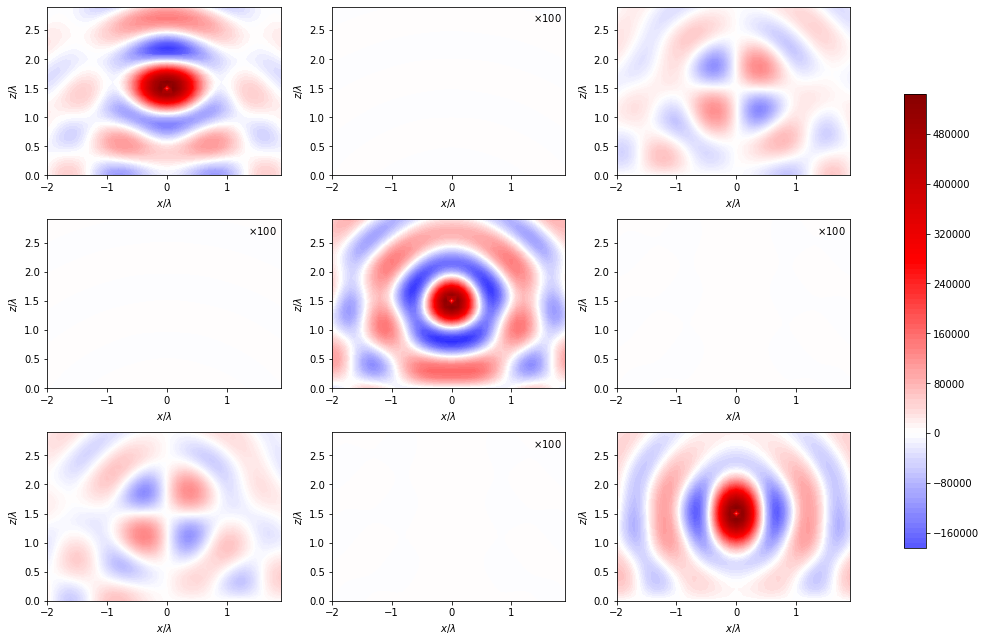

In [15]:
fig, axs = plt.subplots(3, 3, figsize=(12,9))
combinations = [(0,0),(0,1),(0,2),(1,0),(1,1),(1,2),(2,0),(2,1),(2,2)]
v_max,v_min = (560000,-560000)
scale_mixed = 1000

cs00 = axs[0,0].contourf(x*scaling_factor, z*scaling_factor, G0xx_points1 + GMuxx_points3, 100, vmin=v_min, vmax=v_max, cmap=our_cmap)
cs01 = axs[1,0].contourf(x*scaling_factor, z*scaling_factor, (G0yx_points1+ GMuyx_points3)*scale_mixed, 100, vmin=v_min, vmax=v_max, cmap=our_cmap)
cs02 = axs[2,0].contourf(x*scaling_factor, z*scaling_factor, G0zx_points1 + GMuzx_points3, 100, vmin=v_min, vmax=v_max, cmap=our_cmap)
cs10 = axs[0,1].contourf(x*scaling_factor, z*scaling_factor, (G0xy_points1 + GMuxy_points3)*scale_mixed, 100, vmin=v_min, vmax=v_max, cmap=our_cmap)
cs11 = axs[1,1].contourf(x*scaling_factor, z*scaling_factor, G0yy_points1 + GMuyy_points3, 100, vmin=v_min, vmax=v_max, cmap=our_cmap)
cs12 = axs[2,1].contourf(x*scaling_factor, z*scaling_factor, (G0zy_points1 + GMuzy_points3)*scale_mixed, 100, vmin=v_min, vmax=v_max, cmap=our_cmap)
cs20 = axs[0,2].contourf(x*scaling_factor, z*scaling_factor, G0xz_points1 + GMuxz_points3, 100, vmin=v_min, vmax=v_max, cmap=our_cmap)
cs21 = axs[1,2].contourf(x*scaling_factor, z*scaling_factor, (G0yz_points1 + GMuyz_points3)*scale_mixed, 100, vmin=v_min, vmax=v_max, cmap=our_cmap)
cs22 = axs[2,2].contourf(x*scaling_factor, z*scaling_factor, G0zz_points1 + GMuzz_points3, 100, vmin=v_min, vmax=v_max, cmap=our_cmap)

# cs00 = axs[0,0].contourf(x*scaling_factor, z*scaling_factor, GMuxx_points2, 100, cmap=our_cmap)
# cs01 = axs[0,1].contourf(x*scaling_factor, z*scaling_factor, GMuyx_points2, 100, cmap=our_cmap)
# cs02 = axs[0,2].contourf(x*scaling_factor, z*scaling_factor, GMuzx_points2, 100, cmap=our_cmap)
# cs10 = axs[1,0].contourf(x*scaling_factor, z*scaling_factor, GMuxy_points2, 100, cmap=our_cmap)
# cs11 = axs[1,1].contourf(x*scaling_factor, z*scaling_factor, GMuyy_points2, 100, cmap=our_cmap)
# cs12 = axs[1,2].contourf(x*scaling_factor, z*scaling_factor, GMuzy_points2, 100, cmap=our_cmap)
# cs20 = axs[2,0].contourf(x*scaling_factor, z*scaling_factor, GMuxz_points2, 100, cmap=our_cmap)
# cs21 = axs[2,1].contourf(x*scaling_factor, z*scaling_factor, GMuyz_points2, 100, cmap=our_cmap)
# cs22 = axs[2,2].contourf(x*scaling_factor, z*scaling_factor, GMuzz_points2, 100, cmap=our_cmap)
# fig.colorbar(cs00, ax=axs[0,0])
# fig.colorbar(cs01, ax=axs[0,1])
# fig.colorbar(cs02, ax=axs[0,2])
# fig.colorbar(cs10, ax=axs[1,0])
# fig.colorbar(cs11, ax=axs[1,1])
# fig.colorbar(cs12, ax=axs[1,2])
# fig.colorbar(cs20, ax=axs[2,0])
# fig.colorbar(cs21, ax=axs[2,1])
# fig.colorbar(cs22, ax=axs[2,2])

css = [cs00, cs01, cs02, cs10, cs11, cs12, cs20, cs21, cs22] 
css1000 = [(0,1), (1,0), (1,2), (2,1)]
for csij in css:
    for c in csij.collections:
        c.set_edgecolor("face")

for i,j in css1000: 
    axs[i,j].annotate(r'$\times 100$', (0.86,0.91), xycoords='axes fraction')

fig.colorbar(cs22, cax=fig.add_axes([1.05, 0.15, 0.025, 0.7]))
for c in combinations:
    axs[c[0],c[1]].set_xlabel(r'$x/\lambda$')
    axs[c[0],c[1]].set_ylabel(r'$z/\lambda$')
fig.tight_layout(pad=1.0)
fig.savefig('Plots4Maze/G_DE-MU_plot_mu={}.png'.format(data1['m2']), bbox_inches='tight')